<a href="https://colab.research.google.com/github/iknazio98/Ds_Telecom_Churn-/blob/main/Telecom_Churn_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una empresa de telecomunicaciones desea mejorar la retención de sus clientes, identificando aquellos que tienen más chances de abandonar el servicio (Churn). Como científico de datos, tu objetivo será limpiar y preparar un conjunto de datos para el entrenamiento de un modelo de Churn. A continuación, se presentan las preguntas clave que guiarán el proceso de limpieza de datos:

### **Preguntas**

1. ¿Qué insights podemos obtener del análisis exploratorio inicial del conjunto de datos?

2. ¿Qué transformaciones básicas son necesarias para preparar los datos?

3. ¿Cómo podemos identificar y tratar los datos duplicados y los valores nulos?

4. ¿Cómo manejamos los outliers presentes en el dataset?

5. ¿Qué técnicas aplicamos para procesar las variables categóricas?

#**1. Configuración del Ambiente**


---




In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
global datos_churn

#**2. Obtención y Tratamiento de Datos**


---




##**2.1 Cargando las bases de datos**

In [ ]:
def lectura_datos():
    global datos_churn
    url ="https://raw.githubusercontent.com/iknazio98/Ds_Telecom_Churn-/refs/heads/main/base_clientes.json"
    json = pd.read_json(url)
    #Tu código aquí
    response = requests.get(url)
    json_bruto = response.json()
    datos_churn = pd.json_normalize(json_bruto)
    return datos_churn

In [ ]:
lectura_datos()
datos_churn.head()

,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
0,0002-ORFBO,no,femenino,0,si,si,9.0,si,no,DSL,no,si,no,si,si,no,None,None,None,NaN,None
1,0003-MKNFE,no,masculino,0,no,no,9.0,si,si,DSL,no,no,no,no,no,si,mensual,no,cheque,59.9,542.4
2,0004-TLHLJ,si,masculino,0,no,no,4.0,si,no,fibra optica,no,no,si,no,no,no,mensual,si,cheque electronico,73.9,280.85
3,0011-IGKFF,si,masculino,1,si,no,13.0,si,no,fibra optica,no,si,si,no,si,si,mensual,si,cheque electronico,98.0,1237.85
4,0013-EXCHZ,si,femenino,1,si,no,3.0,si,no,fibra optica,no,no,no,si,si,no,mensual,si,cheque,83.9,267.4


##**2.2 Tratamiento de datos**

In [ ]:
url_txt = "https://raw.githubusercontent.com/iknazio98/Ds_Telecom_Churn-/refs/heads/main/Diccionario.txt"
response = requests.get(url_txt) # Hacer la solicitud GET a la URL

if response.status_code == 200:  # Verificar si la solicitud fue exitosa (status code 200)
    contenido = response.text    # El contenido del archivo
    print(contenido)
else:
    print(f"Error al acceder al archivo: {response.status_code}")

La base de datos contiene columnas además del ID de los clientes y el churn:

Cliente:
género: género (masculino y femenino)
anciano: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
pareja: si el cliente tiene o no una pareja
dependientes: si el cliente tiene o no dependientes
tiempo_servicio: meses de contrato del cliente

Servicio de telefonía:
servicio_telefono: suscripción al servicio telefónico
varias_lineas: suscripción a más de una línea telefónica

Servicio de internet:
servicio_internet: suscripción a un proveedor de internet
seguridad_online: suscripción adicional a seguridad en línea
backup_online: suscripción adicional a copias de seguridad en línea
proteccion_dispositivo: suscripción adicional a protección en el dispositivo
soporte_tecnico: suscripción adicional a soporte técnico, menos tiempo de espera
tv_streaming: suscripción a TV por cable
peliculas_streaming: suscripción a streaming de películas

Cuenta:
contrato: tipo de contrato
factura_e

In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   Churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.anciano                  7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

In [ ]:
def aplicar_iqr(df, column):

    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los valores dentro de los límites
    df_sin_outliers = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]

    return df_sin_outliers

In [ ]:
def preprocesamiento():
    global datos_churn
    # Tu código aquí
    lectura_datos()
    # Se eliminan los churn vacíos porque no podemos imputarlos
    datos_churn = datos_churn[datos_churn["Churn"] != ""]

    # Eliminar filas donde tanto 'cuenta.cobros.Total' como 'cuenta.cobros.mensual' sean NaN debido a que no se pueden imputar
    idx = datos_churn[(datos_churn["cuenta.cobros.Total"].isna()) & (datos_churn["cuenta.cobros.mensual"].isna())].index
    datos_churn = datos_churn.drop(idx)

    # Reemplazar valores vacíos y convertir 'cuenta.cobros.Total' a float
    datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].replace(['', ' '], np.nan).astype(float)


    # Mi razonamiento a partir de acá fue de que en general "cuenta.cobros.Total" es la multiplicación de
    # "cliente.tiempo_servicio" y "cuenta.cobros.mensual", normalmente se llega a valores
    #  muy cercanos pero difícil saber cuanto influyen las otras variables en el precio para saber exactamente el valor de "cuenta.cobros.Total".

    # Imputar valores en 'cuenta.cobros.Total' cuando 'cliente.tiempo_servicio' es 0, mi forma de verlo fue de que
    # Cuando 'cliente.tiempo_servicio' es 0.0 "cuenta.cobros.Total" es Nan, por lo que repetí el valor que estaba en
    # "cuenta.cobros.mensual" para imputar "cuenta.cobros.Total"
    datos_churn["cuenta.cobros.Total"] = np.where(
        datos_churn["cliente.tiempo_servicio"] == 0.0,
        datos_churn["cuenta.cobros.mensual"],
        datos_churn["cuenta.cobros.Total"]
    )

    # Imputar valores en 'cliente.tiempo_servicio' basado en otras columnas
    # Misma lógica de 'cuenta.cobros.Total'= 'cliente.tiempo_servicio'*'cuenta.cobros.mensual'
    datos_churn['cliente.tiempo_servicio'] = np.where(
        datos_churn['cliente.tiempo_servicio'].isna(),
        datos_churn['cuenta.cobros.Total'] / datos_churn['cuenta.cobros.mensual'],
        datos_churn['cliente.tiempo_servicio']
    )

    # Imputar valores en 'cuenta.cobros.Total' basados en 'cliente.tiempo_servicio'
    # Acá me di cuenta que cuando 'cuenta.cobros.Total' es Nan y "cliente.tiempo_servicio" !=0.0 se podía imputar bajo la
    # misma lógica de 'cuenta.cobros.Total'= 'cliente.tiempo_servicio'*'cuenta.cobros.mensual'
    datos_churn["cuenta.cobros.Total"] = np.where(
        (datos_churn["cuenta.cobros.Total"].isna()) & (datos_churn["cliente.tiempo_servicio"] != 0.0),
        datos_churn['cliente.tiempo_servicio'] * datos_churn['cuenta.cobros.mensual'],
        datos_churn["cuenta.cobros.Total"]
    )

    # Imputar valores en 'cuenta.contrato' basado en 'cliente.tiempo_servicio'
    # Acá imputé los valores de 'cuenta.contrato' basado en una suposición que hice al analizar datos_churn.groupby('cuenta.contrato')['cliente.tiempo_servicio'].describe()
    datos_churn['cuenta.contrato'] = np.where(
        datos_churn['cuenta.contrato'].isna() & (datos_churn['cliente.tiempo_servicio'] <= 28),
        'mensual',
        np.where(
            datos_churn['cuenta.contrato'].isna() & (datos_churn['cliente.tiempo_servicio'] > 28) & (datos_churn['cliente.tiempo_servicio'] <= 53),
            'un año',
            np.where(
                datos_churn['cuenta.contrato'].isna() & (datos_churn['cliente.tiempo_servicio'] > 53),
                'dos años',
                datos_churn['cuenta.contrato']
            )
        )
    )

    # Imputar valores en 'cuenta.cobros.mensual' cuando es NaN
     # misma lógica de 'cuenta.cobros.Total'= 'cliente.tiempo_servicio'*'cuenta.cobros.mensual'
    datos_churn["cuenta.cobros.mensual"] = np.where(
        datos_churn["cuenta.cobros.mensual"].isna(),
        datos_churn["cuenta.cobros.Total"] / datos_churn["cliente.tiempo_servicio"],
        datos_churn["cuenta.cobros.mensual"]
    )

    # Imputar valores en 'cuenta.facturacion_electronica' y 'cuenta.metodo_pago' con la moda
    datos_churn['cuenta.facturacion_electronica'].fillna(datos_churn['cuenta.facturacion_electronica'].mode()[0], inplace=True)
    datos_churn['cuenta.metodo_pago'].fillna(datos_churn['cuenta.metodo_pago'].mode()[0], inplace=True)

    # Resetear el índice del DataFrame
    datos_churn = datos_churn.reset_index(drop=True)

    # Aplicar la función de IQR para eliminar outliers
    datos_churn =  aplicar_iqr(datos_churn, 'cliente.tiempo_servicio')
    # Me quedan 7096 filas
    return datos_churn

In [ ]:
preprocesamiento()
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7096 entries, 0 to 7105
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7096 non-null   object 
 1   Churn                            7096 non-null   object 
 2   cliente.genero                   7096 non-null   object 
 3   cliente.anciano                  7096 non-null   int64  
 4   cliente.pareja                   7096 non-null   object 
 5   cliente.dependientes             7096 non-null   object 
 6   cliente.tiempo_servicio          7096 non-null   float64
 7   telefono.servicio_telefono       7096 non-null   object 
 8   telefono.varias_lineas           7096 non-null   object 
 9   internet.servicio_internet       7096 non-null   object 
 10  internet.seguridad_online        7096 non-null   object 
 11  internet.backup_online           7096 non-null   object 
 12  internet.proteccion_dispo

##**2.3 Normalizacion de datos**

In [ ]:
for col in datos_churn.columns:
    print(f"Columna: {col}")
    print(datos_churn[col].unique())
    print("-" * 30)

Columna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['no' 'si']
------------------------------
Columna: cliente.genero
['masculino' 'femenino']
------------------------------
Columna: cliente.anciano
[0 1]
------------------------------
Columna: cliente.pareja
['no' 'si']
------------------------------
Columna: cliente.dependientes
['no' 'si']
------------------------------
Columna: cliente.tiempo_servicio
[ 9.          4.         13.          3.         71.         63.
  7.         65.86954118 54.         72.          5.         56.
 34.          1.         45.         50.         23.         55.
 26.         69.         37.         49.         66.         67.
 20.         43.         59.         12.         27.          2.
 25.         29.         14.         35.         64.         39.
 40.         11.          6.         30.         70.         57.
 58.         16.         32.        

In [ ]:
def normalizacion():
    global datos_churn

     # 1. Eliminación de la columna `id_cliente`
    if 'id_cliente' in datos_churn.columns:
        datos_churn = datos_churn.drop('id_cliente', axis=1)
    # 2. Reemplazar las variables binarias por 1 ó 0
    datos_churn['Churn']= np.where(datos_churn['Churn']=="si",1,0)
    datos_churn['cliente.pareja']= np.where(datos_churn['cliente.pareja']=="si",1,0)
    datos_churn['cliente.dependientes']= np.where(datos_churn['cliente.dependientes']=="si",1,0)
    datos_churn['telefono.servicio_telefono']= np.where(datos_churn['telefono.servicio_telefono']=="si",1,0)
    datos_churn['cuenta.facturacion_electronica']= np.where(datos_churn['cuenta.facturacion_electronica']=="si",1,0)
    datos_churn['cliente.genero']= np.where(datos_churn['cliente.genero']=='femenino',1,0)

    # 3. Creación de variables dummy para las columnas restantes
    datos_churn = pd.get_dummies(datos_churn)

    # 4. Convertir columnas de tipo booleano a 0 y 1
    bool_columns = datos_churn.select_dtypes(include='bool').columns
    datos_churn[bool_columns] = datos_churn[bool_columns].astype(int)

    # 5. Reiniciar el índice del DataFrame para eliminar el índice anterior
    datos_churn.reset_index(drop=True, inplace=True)
    # Consideraciones que tengo pensadas probar: cambiar metodo_pago a solamente cheque y automático
    return datos_churn


In [ ]:
normalizacion()
datos_churn.head()

,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,cuenta.facturacion_electronica,cuenta.cobros.mensual,cuenta.cobros.Total,telefono.varias_lineas_no,telefono.varias_lineas_si,telefono.varias_lineas_sin servicio de telefono,internet.servicio_internet_DSL,internet.servicio_internet_fibra optica,internet.servicio_internet_no,internet.seguridad_online_no,internet.seguridad_online_si,internet.seguridad_online_sin servicio de internet,internet.backup_online_no,internet.backup_online_si,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_no,internet.proteccion_dispositivo_si,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_no,internet.soporte_tecnico_si,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_no,internet.tv_streaming_si,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_no,internet.peliculas_streaming_si,internet.peliculas_streaming_sin servicio de internet,cuenta.contrato_dos años,cuenta.contrato_mensual,cuenta.contrato_un año,cuenta.metodo_pago_cheque,cuenta.metodo_pago_cheque electronico,cuenta.metodo_pago_tarjeta de credito (automatico),cuenta.metodo_pago_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.9,542.40,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,1,0,0,0,0,4.0,1,1,73.9,280.85,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.0,1237.85,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.9,267.40,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,9.0,1,1,69.4,571.45,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096 entries, 0 to 7095
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Churn                                                     7096 non-null   int32  
 1   cliente.genero                                            7096 non-null   int32  
 2   cliente.anciano                                           7096 non-null   int64  
 3   cliente.pareja                                            7096 non-null   int32  
 4   cliente.dependientes                                      7096 non-null   int32  
 5   cliente.tiempo_servicio                                   7096 non-null   float64
 6   telefono.servicio_telefono                                7096 non-null   int32  
 7   cuenta.facturacion_electronica                            7096 non-null   int32  
 8   cuenta.cobros.mens

In [ ]:
datos_churn["Churn"].value_counts(normalize=True)

Churn
0    0.734216
1    0.265784
Name: proportion, dtype: float64

In [ ]:
df_minority = datos_churn[datos_churn["Churn"]==1]
df_majority = datos_churn[datos_churn["Churn"]==0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,
         n_samples=len(df_majority),
         random_state=50
        )

In [ ]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [ ]:
df_upsampled['Churn'].value_counts()

Churn
0    5210
1    5210
Name: count, dtype: int64

In [ ]:
datos_churn['Churn'].value_counts()

Churn
0    5210
1    1886
Name: count, dtype: int64

#**3. Modelo Random Forest**


---


In [ ]:
y = datos_churn['Churn']
x = datos_churn.drop(columns='Churn')
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state = 50)

In [ ]:
def pronosticar(train_x, train_y):
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x, train_y)
  return model

In [ ]:
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7937999060591827

#**4. Reducción de Dimensionalidad**


---


##**4.1 Métodos Gráficos**

In [ ]:
def diagrama_violin(df, inicio, fin):
    # Asegurar que Churn siempre esté en el DataFrame
    y = df["Churn"]
    # Seleccionar solo las columnas de tipo int64
    x = df.select_dtypes(include=["int32"]).iloc[:, inicio:fin]

    # Concatenar la columna Churn con las columnas seleccionadas
    df_filtered = pd.concat([y, x], axis=1)

    # Convertir el DataFrame a formato largo (long format)
    df_melted = pd.melt(df_filtered, id_vars="Churn", var_name="features", value_name="valores")

    plt.figure(figsize=(12, 6))

    # Crear el diagrama de violín, diferenciando por la columna Churn y usando la paleta azul-naranja
    sns.violinplot(x="features", y="valores", hue="Churn", data=df_melted, split=True,palette="deep")

    plt.xticks(rotation=90)  # Rotar etiquetas del eje X
    plt.title("Diagrama de Violín: Comparación de Características vs Churn")
    plt.ylabel("Valores")
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()
def diagrama_puntos(df, inicio, fin):
    # Asegura que Churn siempre esté en el dataframe
    y = df["Churn"]
    # Seleccionar solo las columnas de tipo int32 y excluir la columna Churn
    x = df.select_dtypes(include=["int"]).drop(columns="Churn")

    # Filtrar las columnas seleccionadas
    df_filtered = pd.concat([y.reset_index(drop=True), x.iloc[:, inicio:fin]], axis=1)  # Concatenar la columna Churn

    # Convertir el DataFrame a formato largo
    df_melted = pd.melt(df_filtered, id_vars="Churn", var_name="features", value_name="valores")

    plt.figure(figsize=(12, 6))

    # Crear un diagrama de puntos
    sns.pointplot(x="features", y="valores", hue="Churn", data=df_melted, palette="deep", markers=["o", "s"])

    plt.xticks(rotation=90)  # Rotar etiquetas del eje X
    plt.title("Diagrama de Puntos: Comparación de Características vs Churn (int64)")
    plt.xlabel("Características")
    plt.ylabel("Valores")
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

def mapa_calor(df):
    #Tu código aquí
    plt.figure(figsize=(16,14))
    sns.heatmap(df.corr(), annot=True, fmt=".1f")
    return df.corr()

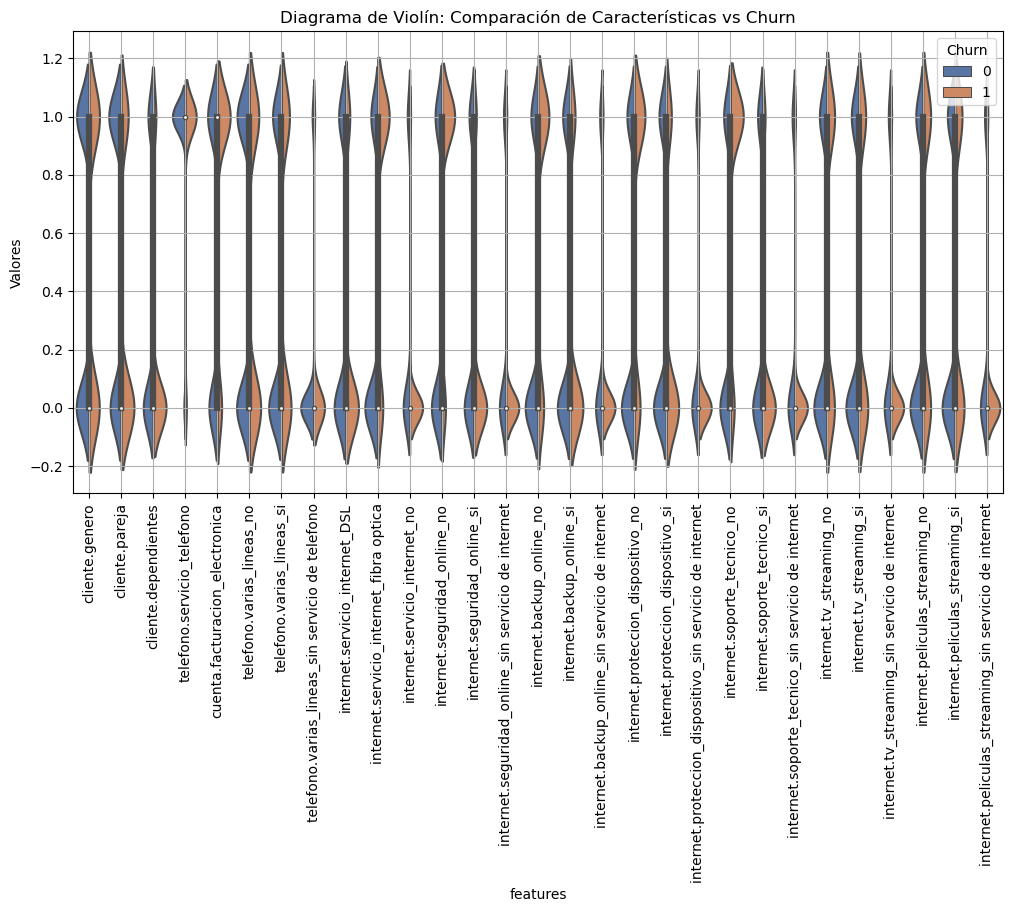

In [ ]:
diagrama_violin(datos_churn, 1, 30)

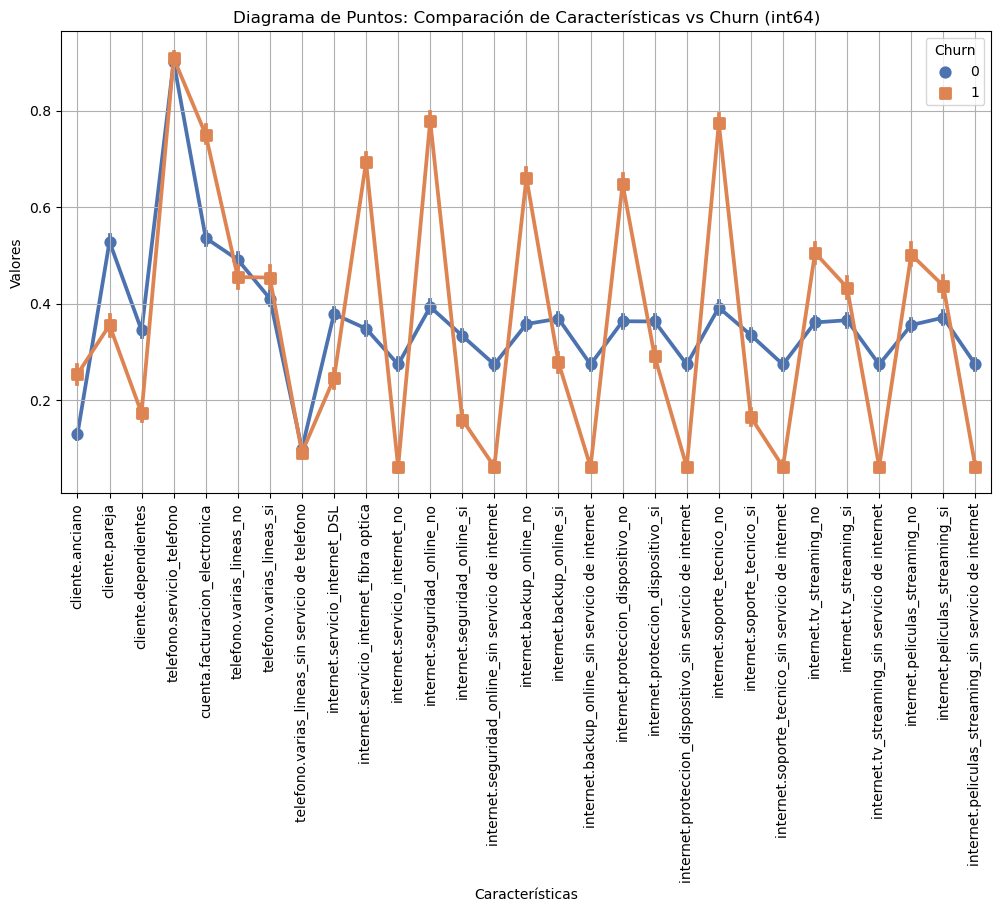

In [ ]:
diagrama_puntos(datos_churn, 1, 30)

In [ ]:
datos_churn.groupby('Churn')["telefono.varias_lineas_sin servicio de telefono"].value_counts(normalize=True)

Churn  telefono.varias_lineas_sin servicio de telefono
0      0                                                  0.901344
       1                                                  0.098656
1      0                                                  0.908802
       1                                                  0.091198
Name: proportion, dtype: float64

In [ ]:
train_x = train_x.drop(columns=["telefono.varias_lineas_sin servicio de telefono"])
test_x = test_x.drop(columns=["telefono.varias_lineas_sin servicio de telefono"])
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7956787224048849

##**4.2 Mapa de Calor**

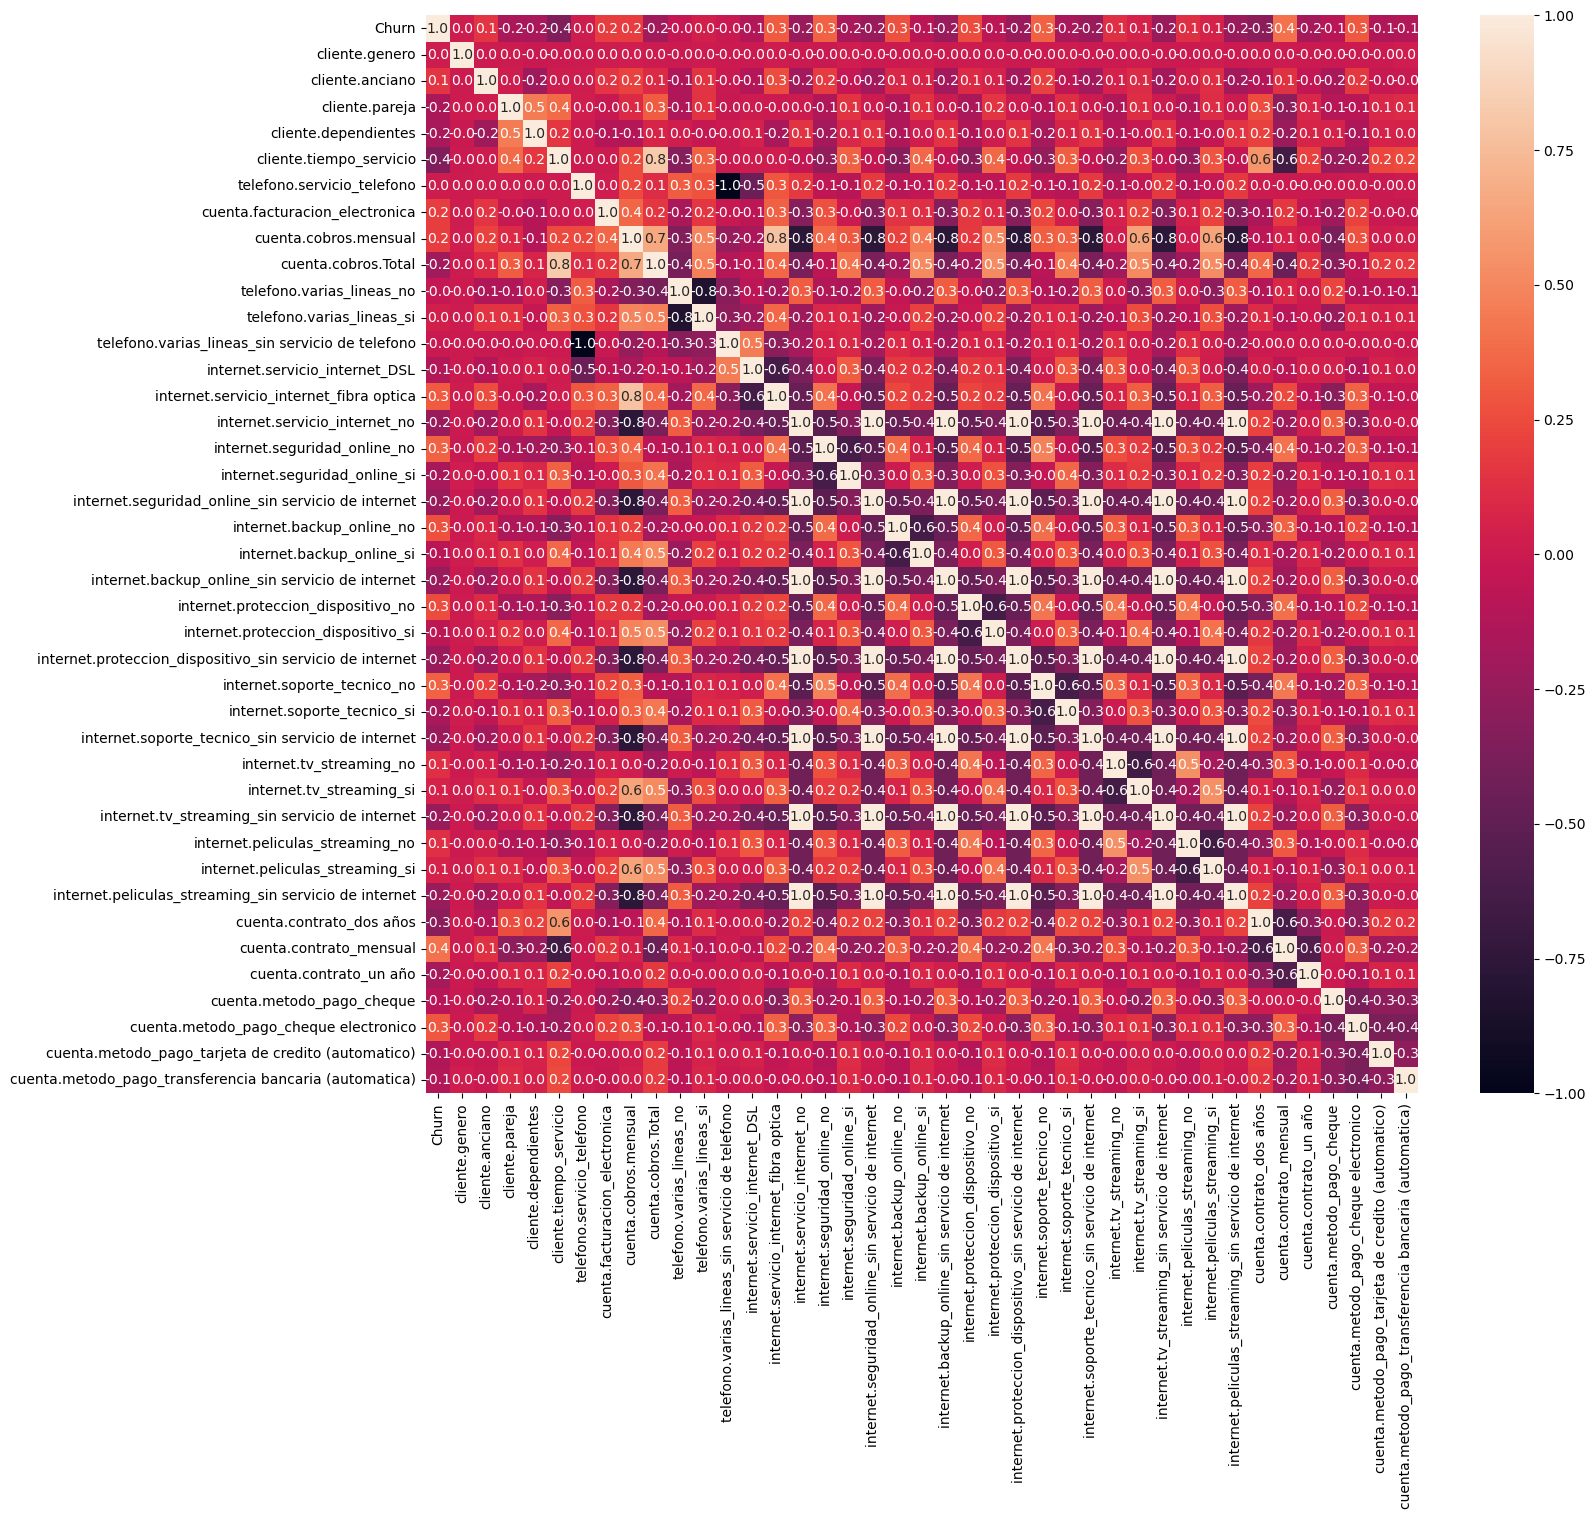

In [ ]:
matriz = mapa_calor(datos_churn)

In [ ]:
matriz2 = matriz>0.99
matriz2 = matriz2.sum()
matriz2[matriz2>1]

internet.servicio_internet_no                               7
internet.seguridad_online_sin servicio de internet          7
internet.backup_online_sin servicio de internet             7
internet.proteccion_dispositivo_sin servicio de internet    7
internet.soporte_tecnico_sin servicio de internet           7
internet.tv_streaming_sin servicio de internet              7
internet.peliculas_streaming_sin servicio de internet       7
dtype: int64

In [ ]:
def identificar_variables(base):
  #Tu código aquí
    columnas = base.index.tolist()

    # Eliminar las columnas que están altamente correlacionadas
    df = datos_churn[columnas]

    return df

In [ ]:
identificar_variables(matriz2[matriz2>1])

,internet.servicio_internet_no,internet.seguridad_online_sin servicio de internet,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_sin servicio de internet
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
7091,0,0,0,0,0,0,0
7092,0,0,0,0,0,0,0
7093,1,1,1,1,1,1,1
7094,0,0,0,0,0,0,0


In [ ]:
train_x = train_x.drop(columns=['internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
test_x = test_x.drop(columns=['internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7909816815406294

##**4.3 Feature Importances**

In [ ]:
def pronosticar_kbest(train_x, test_x, train_y, test_y):
    mejor_k = 0
    mejor_score = 0
    mejores_columnas = []

    # Iterar sobre el rango de posibles valores de k (número de características)
    for k in range(1, train_x.shape[1] + 1):
        seleccionar_mejores = SelectKBest(chi2, k=k)
        seleccionar_mejores.fit(train_x, train_y)
        train_x_kbest = seleccionar_mejores.transform(train_x)

        model = RandomForestClassifier(random_state=50)

        # Validación cruzada
        scores = cross_val_score(model, train_x_kbest, train_y, cv=5, scoring='accuracy')
        score = np.mean(scores)

        # Verificar si se ha alcanzado una mejor precisión
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
            mejor_seleccionador = seleccionar_mejores
            mejores_columnas = train_x.columns[seleccionar_mejores.get_support()]  # Nombres de columnas

    # Ajustar el modelo con las mejores características
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_kbest = mejor_seleccionador.transform(train_x)
    test_x_kbest = mejor_seleccionador.transform(test_x)
    mejor_model.fit(train_x_kbest, train_y)
    print(f"Utilizando SelectKBest:")
    print(f"El mejor número de características seleccionadas es {mejor_k} con un score de {mejor_score:.4f}")
    print(f"Las columnas más importantes son: {mejores_columnas}")

    # Devolver las variables solicitadas


In [ ]:
pronosticar_kbest(train_x, test_x, train_y, test_y)


Utilizando SelectKBest:
El mejor número de características seleccionadas es 25 con un score de 0.7932
Las columnas más importantes son: Index(['cliente.anciano', 'cliente.pareja', 'cliente.dependientes',
       'cliente.tiempo_servicio', 'cuenta.facturacion_electronica',
       'cuenta.cobros.mensual', 'cuenta.cobros.Total',
       'internet.servicio_internet_DSL',
       'internet.servicio_internet_fibra optica',
       'internet.servicio_internet_no', 'internet.seguridad_online_no',
       'internet.seguridad_online_si', 'internet.backup_online_no',
       'internet.backup_online_si', 'internet.proteccion_dispositivo_no',
       'internet.soporte_tecnico_no', 'internet.soporte_tecnico_si',
       'internet.tv_streaming_no', 'internet.peliculas_streaming_no',
       'cuenta.contrato_dos años', 'cuenta.contrato_mensual',
       'cuenta.metodo_pago_cheque', 'cuenta.metodo_pago_cheque electronico',
       'cuenta.metodo_pago_tarjeta de credito (automatico)',
       'cuenta.metodo_pago_tr

In [ ]:
def pronosticar_RFE(train_x, test_x, train_y, test_y):
    model = RandomForestClassifier(random_state=50)
    mejor_n = 0
    mejor_score = 0
    mejores_columnas = []

    # Probar diferentes números de características
    for n in range(1, train_x.shape[1] + 1):
        rfe = RFE(estimator=model, n_features_to_select=n)
        rfe.fit(train_x, train_y)
        train_x_rfe = rfe.transform(train_x)

        # Evaluar el modelo con validación cruzada
        scores = cross_val_score(model, train_x_rfe, train_y, scoring='accuracy')
        score = scores.mean()

        # Verificar si el score es mejor que el anterior
        if score > mejor_score:
            mejor_n = n
            mejor_score = score
            mejor_rfe = rfe
            mejores_columnas = list(train_x.columns[rfe.support_])

    # Entrenar el modelo con las mejores características seleccionadas
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_rfe = mejor_rfe.transform(train_x)
    test_x_rfe = mejor_rfe.transform(test_x)
    mejor_model.fit(train_x_rfe, train_y)


    print(f"Utilizando RFE:")
    print(f"El mejor número de características seleccionadas es {mejor_n} con un score de {mejor_score:.4f}")
    print(f"Las columnas más importantes son: {mejores_columnas}")

In [ ]:
pronosticar_RFE(train_x, test_x, train_y, test_y)


Utilizando RFE:
El mejor número de características seleccionadas es 25 con un score de 0.7973
Las columnas más importantes son: ['cliente.genero', 'cliente.anciano', 'cliente.pareja', 'cliente.dependientes', 'cliente.tiempo_servicio', 'cuenta.facturacion_electronica', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'telefono.varias_lineas_no', 'telefono.varias_lineas_si', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no', 'internet.tv_streaming_no', 'internet.tv_streaming_si', 'internet.peliculas_streaming_no', 'internet.peliculas_streaming_si', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque', 'cuenta.metodo_pago_cheque electronico', 'cuenta.metodo_pago_tarjeta de credito (automatico)', 'cuenta.metodo_pago_transferencia bancaria (automatica)']


In [ ]:
def pronosticar_RFECV(train_x, test_x, train_y, test_y):
    model = RandomForestClassifier(random_state=50)
    mejor_n = 0
    mejor_score = 0
    mejores_columnas = []

    # Probar diferentes números de características
    for n in range(1, train_x.shape[1] + 1):
        rfe = RFE(estimator=model, n_features_to_select=n)
        rfe.fit(train_x, train_y)
        train_x_rfe = rfe.transform(train_x)

        # Evaluar el modelo con validación cruzada
        scores = cross_val_score(model, train_x_rfe, train_y, cv=5, scoring='accuracy')
        score = scores.mean()

        # Verificar si el score es mejor que el anterior
        if score > mejor_score:
            mejor_n = n
            mejor_score = score
            mejor_rfe = rfe
            mejores_columnas = list(train_x.columns[rfe.support_])

    # Entrenar el modelo con las mejores características seleccionadas
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_rfe = mejor_rfe.transform(train_x)
    test_x_rfe = mejor_rfe.transform(test_x)
    mejor_model.fit(train_x_rfe, train_y)
    print(f"Utilizando RFE:")
    print(f"El mejor número de características seleccionadas es {mejor_n} con un score de {mejor_score:.4f}")
    print(f"Las columnas más importantes son: {mejores_columnas}")

In [ ]:
pronosticar_RFECV(train_x, test_x, train_y, test_y)


Utilizando RFE:
El mejor número de características seleccionadas es 25 con un score de 0.7973
Las columnas más importantes son: ['cliente.genero', 'cliente.anciano', 'cliente.pareja', 'cliente.dependientes', 'cliente.tiempo_servicio', 'cuenta.facturacion_electronica', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'telefono.varias_lineas_no', 'telefono.varias_lineas_si', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no', 'internet.tv_streaming_no', 'internet.tv_streaming_si', 'internet.peliculas_streaming_no', 'internet.peliculas_streaming_si', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque', 'cuenta.metodo_pago_cheque electronico', 'cuenta.metodo_pago_tarjeta de credito (automatico)', 'cuenta.metodo_pago_transferencia bancaria (automatica)']


In [ ]:
def pronosticar_PCA(train_x, test_x, train_y, test_y):
    n = 4
    pca = PCA(n_components=n)

    # Ajustar y transformar los datos con PCA
    train_x_pca = pca.fit_transform(train_x)
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_pca, train_y)
    test_x_pca = pca.transform(test_x)

    # Imprimir resultados de PCA
    print("Utilizando PCA:")
    print(f"El número de características seleccionadas es {n} con un score de {model.score(test_x_pca, test_y) * 100:.2f}%")

    # Calcular y mostrar el total de varianza explicada
    total_varianza_explicada = sum(pca.explained_variance_ratio_)
    print(f"Total de varianza explicada por el PCA: {total_varianza_explicada * 100:.2f}%")

    # Visualizar el explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Componentes Principales')
    plt.title('Proporción de Varianza Explicada por Componente Principal')
    plt.xticks(np.arange(1, n + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Obtener las cargas de los componentes
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    component_names = [f'PC{i+1}' for i in range(n)]
    loadings_df = pd.DataFrame(loadings, index=train_x.columns, columns=component_names)

    # Imprimir las cargas de los componentes
    print("Cargas de los Componentes:")
    print(loadings_df.round(3))

In [ ]:
from sklearn.preprocessing import StandardScaler
#PCA es sensible a datos no escalados
scaler = StandardScaler()
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

Utilizando PCA:
El número de características seleccionadas es 4 con un score de 78.16%
Total de varianza explicada por el PCA: 49.33%


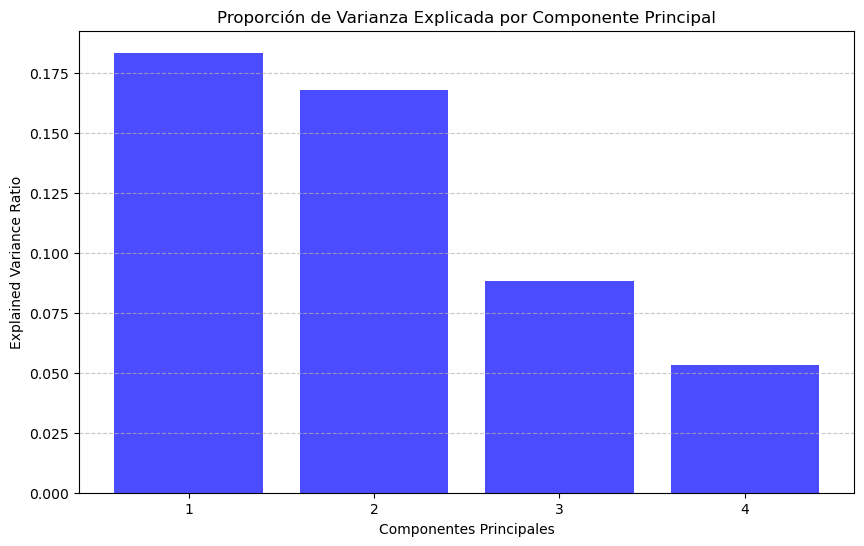

Cargas de los Componentes:
                                                      PC1    PC2    PC3    PC4
cliente.genero                                     -0.000 -0.000 -0.014  0.007
cliente.anciano                                     0.164  0.304 -0.152 -0.084
cliente.pareja                                      0.327 -0.272  0.031 -0.216
cliente.dependientes                                0.065 -0.342  0.082 -0.136
cliente.tiempo_servicio                             0.689 -0.461  0.068 -0.193
telefono.servicio_telefono                          0.045 -0.008 -0.525 -0.362
cuenta.facturacion_electronica                      0.256  0.378 -0.098  0.054
cuenta.cobros.mensual                               0.798  0.499 -0.105 -0.018
cuenta.cobros.Total                                 0.901 -0.140  0.008 -0.124
telefono.varias_lineas_no                          -0.541 -0.138 -0.094  0.176
telefono.varias_lineas_si                           0.573  0.135 -0.215 -0.391
internet.servicio_interne

In [ ]:
pronosticar_PCA(train_x_scaled, test_x_scaled, train_y, test_y)

In [ ]:
#Probar con oversampling
y_up = df_upsampled['Churn']
x_up = df_upsampled.drop(columns='Churn')
X_train, X_test, y_train, y_test = train_test_split(x_up, y_up, test_size=0.3, random_state = 50)


In [ ]:
model_s = pronosticar(X_train, y_train)
model_s.score(X_test, y_test)

0.8944337811900192

In [ ]:
X_train = X_train.drop(columns=["telefono.varias_lineas_sin servicio de telefono",'internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
X_test = X_test.drop(columns=["telefono.varias_lineas_sin servicio de telefono",'internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
model_s = pronosticar(X_train, y_train)
model_s.score(X_test, y_test)

0.8960332693538068

In [ ]:
pronosticar_kbest(X_train, X_test, y_train, y_test)

Utilizando SelectKBest:
El mejor número de características seleccionadas es 21 con un score de 0.8666
Las columnas más importantes son: Index(['cliente.anciano', 'cliente.pareja', 'cliente.dependientes',
       'cliente.tiempo_servicio', 'cuenta.facturacion_electronica',
       'cuenta.cobros.mensual', 'cuenta.cobros.Total',
       'internet.servicio_internet_DSL',
       'internet.servicio_internet_fibra optica',
       'internet.servicio_internet_no', 'internet.seguridad_online_no',
       'internet.seguridad_online_si', 'internet.backup_online_no',
       'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no',
       'internet.soporte_tecnico_si', 'cuenta.contrato_dos años',
       'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico',
       'cuenta.metodo_pago_tarjeta de credito (automatico)',
       'cuenta.metodo_pago_transferencia bancaria (automatica)'],
      dtype='object')


In [ ]:
pronosticar_RFECV(X_train, X_test, y_train, y_test)

Utilizando RFE:
El mejor número de características seleccionadas es 15 con un score de 0.8703
Las columnas más importantes son: ['cliente.genero', 'cliente.pareja', 'cliente.tiempo_servicio', 'cuenta.facturacion_electronica', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'telefono.varias_lineas_no', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico']


In [ ]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Utilizando PCA:
El número de características seleccionadas es 4 con un score de 88.48%
Total de varianza explicada por el PCA: 49.11%


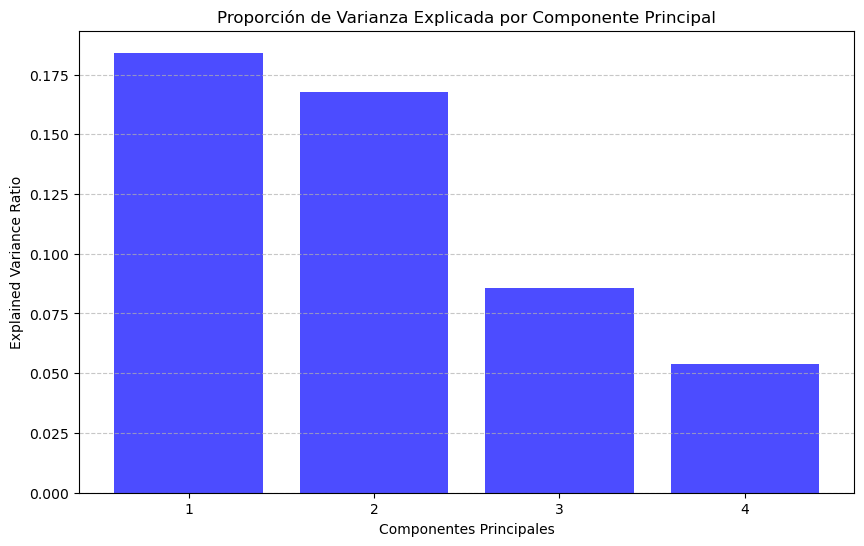

Cargas de los Componentes:
                                                      PC1    PC2    PC3    PC4
cliente.genero                                     -0.011 -0.001  0.000  0.013
cliente.anciano                                    -0.057  0.342 -0.084  0.073
cliente.pareja                                      0.426 -0.003  0.030  0.177
cliente.dependientes                                0.259 -0.253  0.049  0.102
cliente.tiempo_servicio                             0.835  0.013  0.120  0.169
telefono.servicio_telefono                          0.072  0.101 -0.533  0.432
cuenta.facturacion_electronica                     -0.044  0.480 -0.037 -0.045
cuenta.cobros.mensual                               0.336  0.879 -0.059  0.060
cuenta.cobros.Total                                 0.821  0.359  0.095  0.137
telefono.varias_lineas_no                          -0.331 -0.426 -0.176 -0.089
telefono.varias_lineas_si                           0.376  0.489 -0.138  0.346
internet.servicio_interne

In [ ]:
pronosticar_PCA(x_train_scaled, x_test_scaled, y_train, y_test)

In [ ]:
#Selecciono las 15 columnas de pronosticar_RFECV(X_train, X_test, y_train, y_test)
x_up_best = df_upsampled[['cliente.genero', 'cliente.pareja', 'cliente.tiempo_servicio', 'cuenta.facturacion_electronica', 'cuenta.cobros.mensual', 'cuenta.cobros.Total', 'telefono.varias_lineas_no', 'internet.servicio_internet_fibra optica', 'internet.seguridad_online_no', 'internet.backup_online_no', 'internet.proteccion_dispositivo_no', 'internet.soporte_tecnico_no', 'cuenta.contrato_dos años', 'cuenta.contrato_mensual', 'cuenta.metodo_pago_cheque electronico']]
y_up_best = df_upsampled['Churn']


In [ ]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(x_up_best, y_up_best, test_size=0.3, random_state = 50)

In [ ]:
model_s_best = pronosticar(X_train_best, y_train_best)
model_s_best.score(X_test_best, y_test_best)

0.8960332693538068

In [ ]:
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Número de árboles
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Profundidad del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras necesarias en cada hoja
    'bootstrap': [True, False]  # Si se usa muestreo con reemplazo
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=50)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=50, n_jobs=-1)

#Ajustar el modelo en el conjunto de entrenamiento
rf_random.fit(X_train_best, y_train_best)

#Obtener los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", rf_random.best_params_)

#Evaluar el mejor modelo en el conjunto de prueba
best_rf = rf_random.best_estimator_
test_accuracy = best_rf.score(X_test_best, y_test_best)
print(f"Exactitud del mejor modelo en el conjunto de prueba: {test_accuracy:.2f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\palma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\palma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\palma\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\palma\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\palma\anaconda3\Lib\site-package

Mejores hiperparámetros encontrados: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Exactitud del mejor modelo en el conjunto de prueba: 0.90


In [ ]:
import xgboost as xgb

In [ ]:

scaler = StandardScaler()
X_train_best_s = pd.DataFrame(scaler.fit_transform(X_train_best), columns=X_train_best.columns)
X_test_best_s = pd.DataFrame(scaler.transform(X_test_best), columns=X_test_best.columns)

# Crear el modelo de XGBoost
model = xgb.XGBClassifier(random_state=50)

# Ajustar el modelo
model.fit(X_train_best_s, y_train_best)

# Hacer predicciones y evaluar el modelo
predictions = model.predict(X_test_best_s)

# Evaluación del modelo
accuracy = model.score(X_test_best_s, y_test_best)
print(f"Accuracy del modelo XGBoost: {accuracy * 100:.2f}%")

# Validación cruzada
cv_scores = cross_val_score(model, X_train_best_s, y_train_best, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {np.mean(cv_scores) * 100:.2f}%")

Accuracy del modelo XGBoost: 85.35%
Cross-validated accuracy: 83.38%
